In [52]:
from pylab import *
%matplotlib inline 

Para el primer problema modifiqué los códigos que ya se tenían de la clase de manera que pudiesen resolver simultáneamente dos ecuaciones acopladas: la función deseada y su derivada, de manera que fuera posible resolver la ecuación de segundo grado propuesta en la tarea.

Primero definimos las funciones que se utilizarán para el cálculo numérico y que son derivadas del problema que estemos lidiando. Para este caso, consideraremos la ecuación $\ddot y + 0.5 \dot y + \sin y = e^{-t} \sin 3t $. La primera función "dfuncion1" corresponde a la derivada de la función $y(t)$ que deseamos conocer; la segunda: "ddfuncion", a la derivada segunda de la función $y(t)$ (que en esta ocasión se obtiene de despejarla de la ecuación diferencial de segundo orden). La segunda es la derivada tercera de la función que deseamos conocer (ésta sólo se usará en el método de Taylor a segundo orden). Todas estas derivadas están tomadas respecto del parámetro t, y, en general, son funciones tanto de la primera y segunda derivada de la función que deseamos conocer como del parámetro $t$

In [53]:
def dfuncion1(z,y,t):
    return z

In [54]:
def ddfuncion1(z,y,t):
    return -0.5*z - miseno(y,10) + exp(-t)*miseno(t,10)

In [55]:
def dddfuncion1(z,y,t):
    return -0.5*ddfuncion1(z,y,t) - cos(y)*dfuncion1(z,y,t) + 3*cos(3*t)*exp(-t) - exp(-t)*miseno(3*t,10)

Tanto para el método de Euler como para el de Taylor, se puede partir del problema $y' = f(y,t)$ donde la derivada de y se propone de manera discreta para un intervalo pequeño del dominio:

$\frac{y(t + \Delta t) - y(t)}{h} = f(y(t),t)$

De aquí:

$y(t + \Delta t) = y(t) + f(y(t),t) \Delta t = y(t) + y'(t) \Delta t$

De aquí se puede obtener para una serie de puntos en el dominio espaciados por $\Delta t$ el valor aproximado de la función $y(t)$, eso concreta el método de Euler.

El método de Taylor toma a $y(t + \Delta)$ como una función que se puede aproximar como una serie de Taylor alrededor de un punto (de inicio) como:

$y(t) = y(t_0) + y'(t_0)(t - t_0) + \frac{y''(t_0)(t-t_0)^2}{2!} + \cdot \cdot \cdot $

De manera que de aquí se puede tomar a $t$ como $(t_0 + \Delta t)$ y se puede iniciar con un proceso de iteración.

A continuación se definirán los integradores y en los comentarios se explicará para qué sirve cada paso

In [73]:
def euler(funcion,dfuncion,p_ini,t_final,h): #Aquí se definen las funciones, variables, arreglos, etc. de los que dependerá 
    #la función integradora 'euler', las cuales deberán ser introducidas en el orden que se han declarado.
    tiempos = arange(p_ini[0],t_final+h,h) #aquí se determina el dominio como puntos discretos, igualmente especiados en 
    #un intervalo que va de p_ini[0] hasta t_final. El espaciado es de tamaño h.
    y = [0]*len(tiempos) #se declara que y es un arreglo con una cantidad de entradas igual a la cantidad de puntos en el dominio
    y[0] = p_ini[1] #condición inicial para el primer punto del dominio (valor de y(t) en ese punto)
    z = [0]*len(tiempos)#se declara que z es un arreglo con una cantidad de entradas igual a la cantidad de puntos en el dominio
    z[0] = p_ini[2]#condición inicial para el primer punto del dominio (valor de la derivada de y: z(t) en ese punto)
    for i in range(len(tiempos)-1): #Por úlimo se tiene el proceso de iteración que comienza con los valores iniciales 
        #dados por el problema y[i] con i=0. El índice i corre desde 0 hasta el número de puntos en el dominio menos uno,
        # esto garantiza que se tiene el mismo número de valores de y que de puntos en el dominio.
        y[i+1] = y[i] + funcion(z[i], y[i], tiempos[i])*h #proceso numérico para calcular todos los valores de y en el dominio.
        #nótese que depende de los valores de la derivada de y(t), es decir, los z[i], que son calculados en seguida.
        z[i+1] = z[i] + dfuncion(z[i], y[i], tiempos[i])*h #proceso numérico para calcula todos los valores de y en el dominio
        #nótese de nuevo que depende de los valores de la función y(t). Es por ello que deben ser resueltas simultáneamente.
    solucion = [tiempos,y] #guarda los puntos del dominio y los obtenidos para y(t) en un arreglo de 2xi
    return solucion

In [57]:
def taylor2(dfuncion,ddfuncion,dddfuncion,p_ini,t_final,h):
    tiempos = arange(p_ini[0],t_final+h,h)
    y = [0]*len(tiempos)
    y[0] = p_ini[1]
    z = [0]*len(tiempos)
    z[0] = p_ini[2] #TODA esta primera sección tiene la misma función que en el método de euler, con excepción de que
    #en esta ocasión se ha incluido una nueva dependencia de la función taylor2, que es la función dddfunción, explicada al inicio.
    for i in range(len(tiempos)-1): #de nuevo, el proceso iterativo para obtener y(t).
        y[i+1] = y[i] + dfuncion(z[i], y[i], tiempos[i])*h + 0.5*ddfuncion(z[i], y[i], tiempos[i])*(h**2)
        z[i+1] = z[i] + ddfuncion(z[i], y[i], tiempos[i])*h + 0.5*dddfuncion(z[i], y[i], tiempos[i])*(h**2)
        #es importante realtar que en este método se ha considerado el elemento de segundo orden en el desarrollo de Taylor, 
        #es decir, la segunda derivada de y(t) multiplicada por (h**2)/2!. Aquí de nuevo se observa la dependencia entre
        # y(t) y su derviada y su derivada con y(t), lo que hace necesario resolverlas simultáneamente
    solucion = [tiempos,y] 
    return solucion

Los métodos de aproximación de Runke-Kutta se basan en escribir la ecuación $y' = f(y,t)$ como una ecuación integral que finalmente da 

$y_{n+1} = y_n + \int_{t_n}^{t_{n+1}} f(y_n,t_n)dt$. 

La integral que se obtiene será calculada tambien mediante métodos numéricos y dependiendo del orden del método es el método de integración numerica que se usó. Para el segundo orden se usa el método de los trapecios, que indica que: 

$\int_{t_n} ^{t_{n+1}} f(y_n,t_n)dt = \frac{h}{2}(f(y_n,t_n) + f(y_{n+1},t_{n+1}$

Para el orden cuarto, se toma la aproximación de la integral por una combinación del método de Simson y de Euler. Aquí la aproximación de la integral queda como:

$\int_{t_n} ^{t_{n+1}} f(y_n,t_n)dt = \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$

Donde:
$k_1 = h f(y_n,t_n)$, $k_2 = h f(y_n + k_1 /2, t_n + h/2)$, $k_3 = h f(y_n + k_2 /2, t_n + h/2)$ y $k_4 = h f(y_n + k_3, t_n + h)  $

In [59]:
def rk2(funcion,devfuncion,p_ini,t_final,h):
    tiempos = arange(p_ini[0],t_final+h,h)
    y = [0]*len(tiempos)
    y[0] = p_ini[1]
    z = [0]*len(tiempos)
    z[0] = p_ini[2] #De nuevo, estas primeras líneas cumplen la misma función que en los anteriores métodos.
    for i in range(len(tiempos)-1):
        y[i+1] = y[i] + (h/2)*(funcion(z[i], y[i],tiempos[i]) + funcion(z[i],y[i] + h*funcion(z[i],y[i],tiempos[i]), tiempos[i+1])) 
        z[i+1] = z[i] + (h/2)*(devfuncion(z[i],y[i],tiempos[i]) + devfuncion(z[i], y[i] + h*devfuncion(z[i],y[i],tiempos[i]), tiempos[i+1]))
        #De nuevo, en este método se tienen las ecuaciones y(t) y su derivada acopladas y es necesario resolverlas simultáneamente
        #Ahora, los términos correspondientes a la función 'funcion' y 'devfuncion' son la derivada primera y segunda respectivamente de y(t)
        #y la evaluación en ciertos puntos que indica la integración numérica.
    solucion = [tiempos,y]
    return solucion

In [60]:
def rk4(funcion,devfuncion,p_ini,t_final,h):
    tiempos = arange(p_ini[0],t_final+h,h)
    y = [0]*len(tiempos)
    y[0] = p_ini[1]
    z = [0]*len(tiempos)
    z[0] = p_ini[2] #Las primeras líneas tienen la misma función que los anteriores métodos.
    for i in range(len(tiempos)-1): #iniciando con el proceso iterativo, ha de comprenderse que la función f y su derivada
        #dependen una de la otra, de manera que se vuelve necesario otra vez que la solución sea calculada otra vez de manera
        #simultánea para ambas. A continuación se definen los números necesarios para calcular la integral numérica, en función
        #de los otros números necesarios para calcular la integral numérica correspondiente a la derivada de f.
        k1 = h*funcion(z[i],y[i],tiempos[i])
        k2 = h*funcion(z[i],y[i] + k1/2, tiempos[i] + h/2)
        k3 = h*funcion(z[i],y[i] + k2/2, tiempos[i] + h/2)
        k4 = h*funcion(z[i],y[i] + k3, tiempos[i] + h)
        y[i+1] = y[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4) #para solucion x, donde dfuncion es la derivada de x        
        q1 = h*devfuncion(z[i],y[i],tiempos[i])
        q2 = h*devfuncion(z[i],y[i] + q1/2, tiempos[i] + h/2)
        q3 = h*devfuncion(z[i],y[i] + q2/2, tiempos[i] + h/2)
        q4 = h*devfuncion(z[i],y[i] + q3, tiempos[i] + h)
        z[i+1] = z[i] + (1/6)*(q1 + 2*q2 + 2*q3 + q4)
    solucion = [tiempos,y]
    return solucion

Finalmente, para mostrar que los cuatro métodos funcionan y que deben dar una solución bastante parecida se desarrolla para la ecuación planteada en el problema 1 y de graficarán las soluciones a continuación:

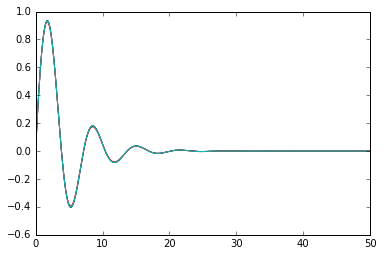

In [74]:
sol = rk4(dfuncion1,ddfuncion1,[0,0,1],50,0.01)
sol1 = rk2(dfuncion1,ddfuncion1,[0,0,1],50,0.01)
sol2 = taylor2(dfuncion1,ddfuncion1,dddfuncion1,[0,0,1],50,0.01)
sol3 = euler(dfuncion1,ddfuncion1,[0,0,1],50,0.01)

plot(sol[0],sol[1],sol1[0],sol1[1],sol2[0],sol2[1],sol3[0],sol3[1])

Aquí a simple vista se observa una gran congruencia entre los resultados obtenidos con los cuatro métodos por separado, lo que nos da una garantía de que los cuatro funcionan y dan una proximación bastante buena.

In [51]:
def factorial(x):
    fac=1
    veces = arange(0,x,1)
    for i in range(len(veces)):
        fac = fac*(i+1)
    return fac

Estas funciones definidas aquí son auxiliares que creamos en el salón.

In [50]:
def miseno(x,h):
    x,y = x%(2*pi),0.
    if x <= (pi/2):
        x = x
    elif (pi/2) < x <= pi:
        x = pi-x
    elif pi < x <= ((3*pi)/2):
        x = -(x-pi)
    else:
        x = x-2*pi
    for i in range(h):
        p = 2*i+1
        y += ((-1)**i)*(x**(p)/factorial(p))
    return y